# Configuración del ambiente

In [ ]:
pip install yfinance

In [ ]:
pip install ta

# Obtención de datos

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import yfinance as yf
import ta
import time

def datos_historicos(ticker):
    # Descargar datos históricos
    datos = yf.download(ticker, start="2010-01-01", end="2024-08-27")

    # Calcular indicadores técnicos
    '''
    datos['SMA50'] = ta.trend.sma_indicator(datos['Close'], window=50)
    datos['SMA200'] = ta.trend.sma_indicator(datos['Close'], window=200)
    datos['MACD'] = ta.trend.macd(datos['Close'])
    datos['MACD_Signal'] = ta.trend.macd_signal(datos['Close'])
    datos['MACD_Hist'] = ta.trend.macd_diff(datos['Close'])
    datos['RSI'] = ta.momentum.rsi(datos['Close'], window=14)'''

    # Columnas

    datos = datos[['Open', 'High',	'Low',	'Close','Volume','Adj Close']]#'SMA50', 'SMA200', 'MACD', 'MACD_Signal', 'MACD_Hist', 'RSI'
    while True:
      new_data = yf.download(ticker, period='1d', interval='5m')
      data = pd.concat([datos, new_data]).drop_duplicates()
      time.sleep(60)
      return data

    # Fetch the latest data (intraday or daily)


    # Update the DataFrame with new data


    # Display the updated DataFrame
    #$print(data.tail())

    # Pause for a minute before fetching new data




    # Ticker
ticker = 'SPY'
datos_SP500 = datos_historicos(ticker)
datos_SP500.index.name = 'Date'
datos_SP500.to_csv(f'{ticker}_datos_historicos.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
datos_SP500.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04 00:00:00,112.370003,113.389999,111.510002,113.330002,118944600,86.580757
2010-01-05 00:00:00,113.260002,113.680000,112.849998,113.629997,111579900,86.809959
2010-01-06 00:00:00,113.519997,113.989998,113.430000,113.709999,116074400,86.871025
2010-01-07 00:00:00,113.500000,114.330002,113.180000,114.190002,131091100,87.237755
2010-01-08 00:00:00,113.889999,114.620003,113.660004,114.570000,126402800,87.528069


In [ ]:
datos_SP500.sample(10)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-05-18 00:00:00,235.729996,237.750000,235.429993,236.770004,107047700,209.632355
2022-01-26 00:00:00,440.720001,444.040009,428.859985,433.380005,186391100,417.428986
2020-11-23 00:00:00,357.279999,358.820007,354.869995,357.459991,63230600,338.332031
2017-08-09 00:00:00,246.470001,247.309998,246.059998,247.250000,62632600,219.978699
2010-06-02 00:00:00,108.080002,110.339996,107.510002,110.330002,240243700,84.635948
2018-05-10 00:00:00,270.339996,272.390015,270.220001,272.019989,72063900,245.439911
2019-06-24 00:00:00,294.230011,294.579987,293.470001,293.640015,47582700,271.401062
2017-10-17 00:00:00,255.229996,255.520004,254.979996,255.470001,31561000,228.420029
2010-06-03 00:00:00,110.650002,111.059998,109.580002,110.709999,226618300,84.927444


In [ ]:
datos_SP500.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2024-09-03 11:55:00-04:00,556.020020,556.150024,555.469971,555.599976,330506,555.599976
2024-09-03 12:00:00-04:00,555.590027,556.159180,555.570007,556.015015,161281,556.015015
2024-09-03 12:05:00-04:00,556.010010,556.219971,555.450012,555.559998,272357,555.559998
2024-09-03 12:10:00-04:00,555.549988,556.008789,555.210022,555.984985,225105,555.984985
2024-09-03 12:15:00-04:00,555.880005,555.880005,555.880005,555.880005,0,555.880005


# Función para detectar tendencia
Extraemos el precio actual del índice SP500 en dólares USD y la variación de su precio respecto al día anterior, ambas variables serán guardadas en la función `extraer_tendencia()`

In [ ]:
def extraer_tendencia():
    global datos_SP500, precio_actual, tendencia, media_sp500, decision

    # Get the most recent prices
    precio_actual = datos_SP500['Close'].iloc[-1]  # Latest closing price
    precio_previo = datos_SP500['Close'].iloc[-2]  # Previous day's closing price

    # Determine the trend
    if precio_actual > precio_previo:
        tendencia = 'Alcista'
    elif precio_actual < precio_previo:
        tendencia = 'Bajista'
    else:
        tendencia = 'Lateral'

    # Return the current price and trend
    return precio_actual, tendencia

# Example usag
extraer_tendencia()
print(f"Precio actual: {precio_actual}, Tendencia: {tendencia}")


Precio actual: 555.8800048828125, Tendencia: Bajista


# Limpieza de datos
Crearemos una copia de la base `datos_sp500` para realizar la limpieza de datos en esta nueva base `df_clean`, sin modificar la base original. Luego eliminaremos duplicados, valores nulos y outliers para construir la función `limpieza_datos()`

In [ ]:
def limpieza_datos():
  global datos_SP500, precio_actual, tendencia, media_sp500, decision
    # Make a copy of the original DataFrame
  df_clean = datos_SP500.copy()

    # Remove duplicated entries based on the index
  df_clean = df_clean[~df_clean.index.duplicated(keep='first')]

    # Handle missing values in the 'Close' column (if any)
  df_clean = df_clean[~df_clean['Close'].isnull()]

    # Filter out rows where 'Volume' is zero
  df_clean = df_clean[df_clean['Volume'] > 0]

    # Quantile-based filtering to remove outliers in 'Close' prices
  valor = df_clean['Close']
  Q1 = valor.quantile(0.25)
  Q3 = valor.quantile(0.75)
  seleccion = (valor >= Q1) & (valor <= Q3)
  df_clean = df_clean[seleccion]

    # Calculate the mean of the 'Close' prices
  media_sp500 = df_clean['Close'].mean().round(2)
  return media_sp500

limpieza_datos()
print(f"Media del S&P 500 después de la limpieza: {media_sp500}")









Media del S&P 500 después de la limpieza: 246.85


# Algoritmo de toma de decisión
Crearemos una función `tomar_decision()` dentro de ella construiremos el algoritmo que retornará la variable `decision`:

In [ ]:
#Creamos la función tomar_decision() con las condicionales
def tomar_decision():
  global datos_SP500, precio_actual, tendencia, media_sp500, decision
    # Decision logic based on price and trend
  if (precio_actual >= media_sp500) and (tendencia == 'Alcista'):
        decision = 'Vender'
  elif (precio_actual < media_sp500) and (tendencia == 'Bajista'):
        decision = 'Comprar'
  else:
        decision = 'Esperar'

  return decision

tomar_decision()
print(f"La decisión es: {decision}")

La decisión es: Esperar


# Función para crear una visualización
Creamos una función `visualizacion()` dentro de ella, usando la librería `matplotlib` vamos a crear un gráfico.

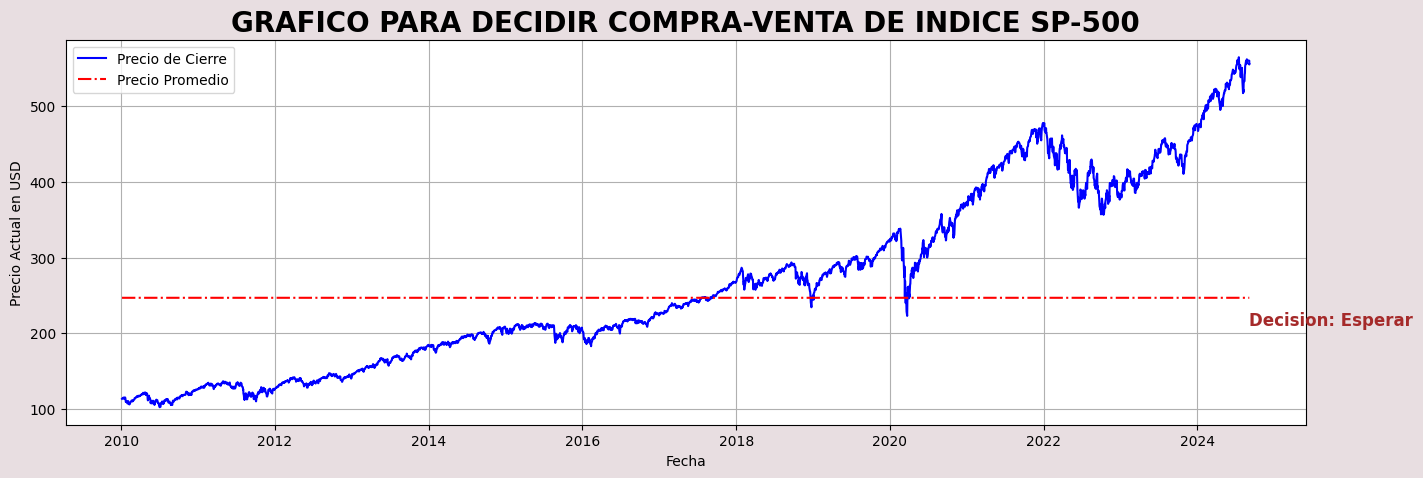

In [ ]:
#Creamos la función visualizacion()
def visualizacion():
  global datos_SP500, precio_actual, tendencia, media_sp500, decision
  datos_SP500['Promedio'] = media_sp500
  #Algoritmo para dar color al texto de la variable 'algoritmo_decision'
  if decision == 'Vender':
      color_decision = 'green'
  elif decision =='Comprar':
      color_decision = 'red'
  else:
      color_decision = 'brown'
  #Configuramos el tamaño del gráfico en una proporción de 16x5,damos color al fondo del gráfico
  plt.rc('figure',figsize = (16,5),facecolor='#E8DEE1')
  #Agregamos un título al gráfico y a los ejes x,y
  plt.title('GRAFICO PARA DECIDIR COMPRA-VENTA DE INDICE SP-500',fontsize=20,weight = 'bold')
  plt.xlabel('Fecha')
  plt.ylabel('Precio Actual en USD')
  #Con el método plot()dibujamos una línea en el gráfico, con los datos del índice y la columna 'Close' de la base
  #df_bitcoin,nombramos etiqueta,damos estilo y color a dicha línea
  plt.plot(datos_SP500.index, datos_SP500['Close'], label='Precio de Cierre', linestyle='-', color='Blue')
  #Con el método plot()dibujamos una línea en el gráfico, con los datos del índice y la columna 'Promedio' de la base
  #df_bitcoin,nombramos etiqueta y damos estilo y color
  plt.plot(datos_SP500.index, datos_SP500['Promedio'], label='Precio Promedio', linestyle='dashdot', color='Red')
  #Con el método annotate()muestra un mensaje dentro del gráfico con la decisión calculada del algoritmo_decision,
  #damos al texto tamaño, color y resaltamos
  plt.annotate(f'Decision: {decision}',xy=(datos_SP500.index[-1], 210), fontsize=12,
               color=color_decision,weight = 'bold')
  #Agregamos leyendas al gráfico
  plt.legend()
  #Agregamos cuadrículas al gráfico, para observar mejor las intersecciones de los ejes
  plt.grid()
  #Finalmente, usando el método show() mostramos en pantalla el gráfico que acabamos de configurar.
  plt.show()


visualizacion()

# Automatización
El trabajo termina cuando la solución al problema está automatizada, esto permite soluciones automáticas para nuevos lotes de información.

Importaremos el método `clear_ouput()` y la biblioteca time para construir un loop infinito que ejecute permanentemente y en intervalos de 5 minutos, las funciones que hemos construído previamente.

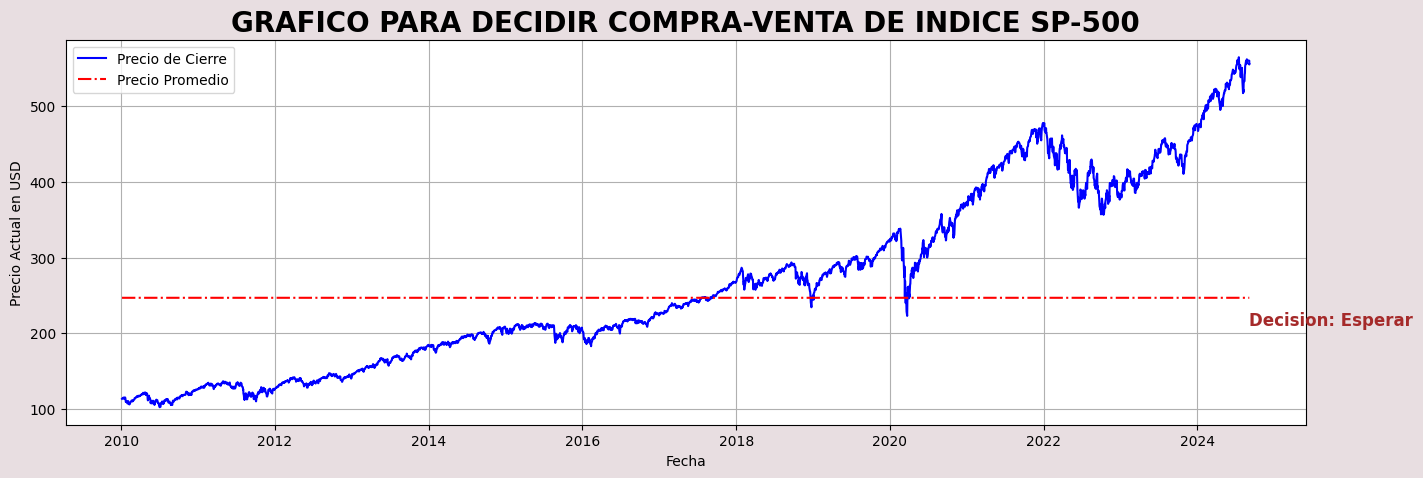

In [ ]:
#Importamos el método 'clear_output()', este método nos permite borrar los resultados de la pantalla antes de imprimir
#un nuevo gráfico, y así evitar tener más de un gráfico en la pantalla
from IPython.display import clear_output
#Importamos la biblioteca ‘time’, usamos su método time.sleep(300) para interrumpir la ejecución del código
#cada 300 segundos o 5 minutos.
import time
#Finalmente creamos un loop infinito:
while(True):
  clear_output()
  extraer_tendencia()
  limpieza_datos()
  tomar_decision()
  visualizacion()
  time.sleep(300)